# Step 1: Reading the merged file containing all the records

In [6]:
import pandas as pd
df = pd.read_excel("C:/Users/layas/OneDrive/Desktop/Layashree documents/NEU Cources/Intro to Programming in DS/output merged file/allconfinal.xlsx")
df.head(10)

,Total,Male,Female,Unknown,Year,Region,Group,Subgroup
0,4321.0,2193.0,2128.0,0.0,2014,Jamaica,Age,Under 18 years
1,2638.0,1324.0,1314.0,0.0,2014,Jamaica,Age,18 to 24 years
2,3517.0,1748.0,1769.0,0.0,2014,Jamaica,Age,25 to 34 years
3,3507.0,1529.0,1978.0,0.0,2014,Jamaica,Age,35 to 44 years
4,2887.0,1053.0,1834.0,0.0,2014,Jamaica,Age,45 to 54 years
5,1477.0,514.0,963.0,0.0,2014,Jamaica,Age,55 to 64 years
6,679.0,232.0,447.0,0.0,2014,Jamaica,Age,65 years and over
7,0.0,0.0,0.0,0.0,2014,Jamaica,Age,Unknown
8,1157.0,445.0,712.0,0.0,2014,Jamaica,Occupation,"Management, professional, and related occupations"
9,2136.0,985.0,1151.0,0.0,2014,Jamaica,Occupation,Service occupations


In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87991 entries, 0 to 87990
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Total     87991 non-null  float64
 1   Male      87991 non-null  float64
 2   Female    87991 non-null  float64
 3   Unknown   87991 non-null  float64
 4   Year      87991 non-null  int64  
 5   Region    87991 non-null  object 
 6   Group     87991 non-null  object 
 7   Subgroup  87991 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 5.4+ MB


Total       0
Male        0
Female      0
Unknown     0
Year        0
Region      0
Group       0
Subgroup    0
dtype: int64

In [8]:
df.shape

(87991, 8)

In [9]:
all_continents = df['Region'].unique()
all_years = df['Year'].unique()
all_continents, all_years

(array(['Jamaica', 'Japan', 'Italy', 'Israel', 'Cabo Verde', 'Jordan',
        'Central African Republic', 'Kazakhstan', 'Chad', 'Kenya',
        'Congo, Democratic Republic', 'Korea, North', 'Congo, Republic',
        'Korea, South', "Cote d'Ivoire", 'Kosovo', 'Djibouti', 'Kuwait',
        'Korea', 'Egypt', 'Kyrgyzstan', 'Eritrea', 'Laos', 'Ethiopia',
        'Bosnia and Herzegovina', 'Afghanistan', 'Latvia', 'Gabon',
        'Lebanon', 'Gambia', 'Lesotho', 'Ghana', 'Liberia', 'Guinea',
        'Libya', 'Guinea-Bissau', 'Lithuania', 'Luxembourg', 'Macau',
        'North Macedonia', 'Madagascar', 'Bulgaria', 'Albania', 'Malawi',
        'Malaysia', 'Mali', 'Maldives', 'Mauritania', 'Malta', 'Mauritius',
        'Marshall Islands', 'Morocco', 'Martinique', 'Mozambique',
        'Namibia', 'Mexico', 'Niger', 'Moldova', 'Nigeria', 'Mongolia',
        'Micronesia, Federated States', 'Rwanda', 'Croatia', 'Algeria',
        'Montenegro', 'Senegal', 'Montserrat', 'Sierra Leone',
        'Seyc

# Step 2: Data Cleaning

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline  

Filtered records to take data from year greater than 2005. This is done because the occupation data segeregation is defferent compared to all the other columns

In [18]:
# Filter to include only years after 2005
df = df[df['Year'].astype(int) > 2005]

# Get sorted lists of all unique years and regions (continents)
all_years = sorted(df['Year'].unique(), key=int)
all_continents = sorted(df['Region'].unique())

# Get the count of records for each (Year, Region) combination
continent_year_counts = df.groupby(['Year', 'Region']).size().reset_index(name='Count')

# Create a full grid of all possible Year-Region combinations
complete_grid = pd.DataFrame(
    [(year, continent) for year in all_years for continent in all_continents],
    columns=['Year', 'Region']
)

# Merge actual counts with the full grid
result = pd.merge(complete_grid, continent_year_counts, on=['Year', 'Region'], how='left')
result['Count'] = result['Count'].fillna(0)
result['Has_Data'] = (result['Count'] > 0).astype(int)

# Reshape for visualization
availability_table = result.pivot(index='Region', columns='Year', values='Has_Data').fillna(0).astype(int)


In [15]:
# Identify missing Year-Region pairs
missing = result[result['Has_Data'] == 0][['Year', 'Region']]
print(f"\nMissing Combinations ({len(missing)} total):")

if len(missing) > 0:
    # Organize missing years by region
    missing_by_region = {}
    for region in all_continents:
        region_missing = missing[missing['Region'] == region]
        if not region_missing.empty:
            missing_by_region[region] = sorted(region_missing['Year'].tolist())

    # Display missing combinations as a clean DataFrame
    missing_df = pd.DataFrame({
        'Region': list(missing_by_region.keys()),
        'Missing Years': [str(years) for years in missing_by_region.values()]
    })
    display(missing_df)
else:
    print("No missing combinations - complete coverage!")


Missing Combinations (278 total):


,Region,Missing Years
0,American Samoa,"[2007, 2010, 2011, 2012, 2013, 2014, 2015, 201..."
1,Anguilla,"[2019, 2021]"
2,Aruba,[2020]
3,Brunei,"[2014, 2019, 2020]"
4,Comoros,"[2006, 2007, 2008, 2009, 2010, 2012, 2013, 201..."
5,Curacao,"[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]"
6,Equatorial Guinea,"[2006, 2007, 2011]"
7,Eswatini,"[2006, 2007, 2013]"
8,French Guiana,"[2007, 2008, 2010, 2011, 2012, 2013, 2014, 201..."
9,French Polynesia,"[2009, 2013, 2015, 2018, 2019, 2020, 2021]"


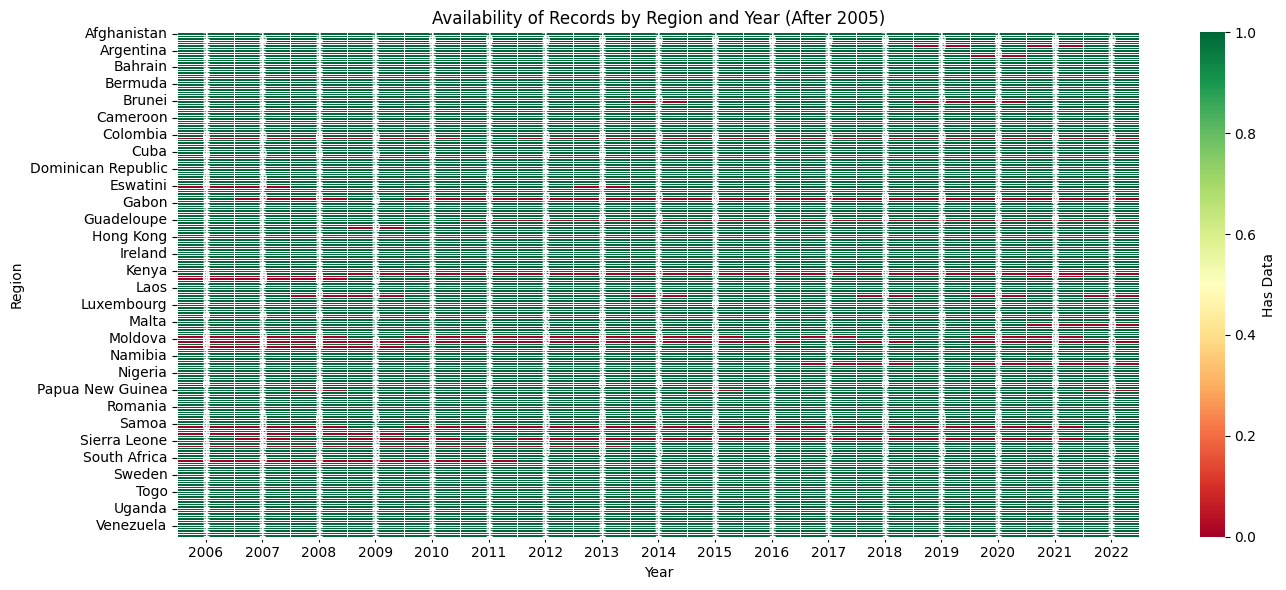

In [19]:
# Plot heatmap of data availability
plt.figure(figsize=(14, 6))
sns.heatmap(
    availability_table,
    cmap="RdYlGn",
    cbar_kws={'label': 'Has Data'},
    linewidths=0.5,
    vmin=0, vmax=1,
    annot=True, fmt='d'
)

plt.title('Availability of Records by Region and Year (After 2005)')
plt.xlabel('Year')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [21]:
print(f"Dataset loaded with {len(df)} rows and {df.columns.tolist()} columns")

# Identify the years in the dataset
years = sorted(df['Year'].unique())
print(f"Years in the dataset: {years}")
num_years = len(years)

# Get countries present in each year
countries_by_year = {}
for year in years:
    countries_by_year[year] = set(df[df['Year'] == year]['Region'].unique())
    print(f"Year {year}: {len(countries_by_year[year])} countries")

# Count the number of years each country appears in
from collections import Counter

country_year_counts = Counter()
for year_set in countries_by_year.values():
    for country in year_set:
        country_year_counts[country] += 1

# Keep countries that appear in all years OR missing only 1 year
common_countries = [country for country, count in country_year_counts.items() if count >= num_years - 2]

print(f"\nNumber of countries present in all years or missing only one year: {len(common_countries)}")
print("Selected countries:")
for country in sorted(common_countries):
    print(f"- {country}")

# Filter the dataset to include only those countries
df_common = df[df['Region'].isin(common_countries)]
print(f"\nFiltered dataset has {len(df_common)} rows (down from {len(df)} rows)")

# Save the filtered dataset
output_path = "C:/Users/layas/OneDrive/Desktop/Layashree documents/NEU Cources/Intro to Programming in DS/Mergefn/common_countries_dataset.xlsx"
df_common.to_excel(output_path, index=False)
print(f"Filtered dataset saved to {output_path}")


Dataset loaded with 87966 rows and ['Total', 'Male', 'Female', 'Unknown', 'Year', 'Region', 'Group', 'Subgroup'] columns
Years in the dataset: [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Year 2006: 190 countries
Year 2007: 189 countries
Year 2008: 190 countries
Year 2009: 192 countries
Year 2010: 194 countries
Year 2011: 192 countries
Year 2012: 193 countries
Year 2013: 189 countries
Year 2014: 193 countries
Year 2015: 192 countries
Year 2016: 195 countries
Year 2017: 194 countries
Year 2018: 192 countries
Year 2019: 194 countries
Year 2020: 188 countries
Year 2021: 189 countries
Year 2022: 192 countries

Number of countries present in all years or missing only one year: 178
Selected countries:
- Afghanistan
- Albania
- Algeria
- Angola
- Anguilla
- Antigua and Barbuda
- Argentina
- Armenia
- Aruba
- Australia
- Austria
- Azerbaijan
- Bahamas
- Bahrain
- Bangladesh
- Barbados
- Belarus
- Belgium
- Belize
- Benin
- Bermuda
- Bhu

In [24]:
# Step 1: Identify non-common countries (i.e., those missing more than 1 year)
non_common_countries = set(df['Region'].unique()) - set(common_countries)

# Step 2: For each non-common country, get the list of years it is present
data = []
for country in sorted(non_common_countries):
    years_present = sorted(df[df['Region'] == country]['Year'].unique())
    data.append({'Country': country, 'Years_Present': years_present})

# Step 3: Create a DataFrame from the collected data
non_common_df = pd.DataFrame(data)

# Step 4: Display the non-common countries and their years of presence
print("\nNon-common countries (missing more than two year) and the years they are present in:")
print(non_common_df.to_string(index=False))



Non-common countries (missing more than two year) and the years they are present in:
                     Country                                                                        Years_Present
              American Samoa                                                                   [2006, 2008, 2009]
                      Brunei [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018, 2021, 2022]
                     Comoros                                                                               [2011]
                     Curacao                               [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
           Equatorial Guinea [2008, 2009, 2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
                    Eswatini [2008, 2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
               French Guiana                                                                         [2006, 2009]
  

In [25]:
df_common

,Total,Male,Female,Unknown,Year,Region,Group,Subgroup
0,4321.0,2193.0,2128.0,0.0,2014,Jamaica,Age,Under 18 years
1,2638.0,1324.0,1314.0,0.0,2014,Jamaica,Age,18 to 24 years
2,3517.0,1748.0,1769.0,0.0,2014,Jamaica,Age,25 to 34 years
3,3507.0,1529.0,1978.0,0.0,2014,Jamaica,Age,35 to 44 years
4,2887.0,1053.0,1834.0,0.0,2014,Jamaica,Age,45 to 54 years
...,...,...,...,...,...,...,...,...
87986,275.0,144.0,131.0,0.0,2022,Italy,Broad Class of Admission,Family-sponsored preferences
87987,1514.0,877.0,637.0,0.0,2022,Italy,Broad Class of Admission,Employment-based preferences
87988,215.0,123.0,92.0,0.0,2022,Italy,Broad Class of Admission,Diversity
87989,60.0,32.0,28.0,0.0,2022,Italy,Broad Class of Admission,Refugees and asylees


In [26]:
occupation_years = df[df['Group'] == 'Occupation'].groupby('Subgroup')['Year'].unique()
print(occupation_years)



Subgroup
Construction, extraction, maintenance and repair occupations    [2014, 2013, 2012, 2011, 2010, 2009, 2008, 200...
Farming, fishing, and forestry occupations                      [2014, 2013, 2012, 2011, 2010, 2009, 2008, 200...
Homemakers                                                      [2014, 2013, 2012, 2011, 2010, 2009, 2008, 200...
Management, professional, and related occupations               [2014, 2013, 2012, 2011, 2010, 2009, 2008, 200...
Military                                                        [2014, 2013, 2012, 2011, 2010, 2009, 2008, 200...
No occupation/not working outside home                          [2014, 2013, 2012, 2011, 2010, 2009, 2008, 200...
Production, transportation, and material moving occupations     [2014, 2013, 2012, 2011, 2010, 2009, 2008, 200...
Retirees                                                        [2014, 2013, 2012, 2011, 2010, 2009, 2008, 200...
Sales and office occupations                                    [2014, 2013, 20

# Step 3: Exploratory Data Analysis (EDA)

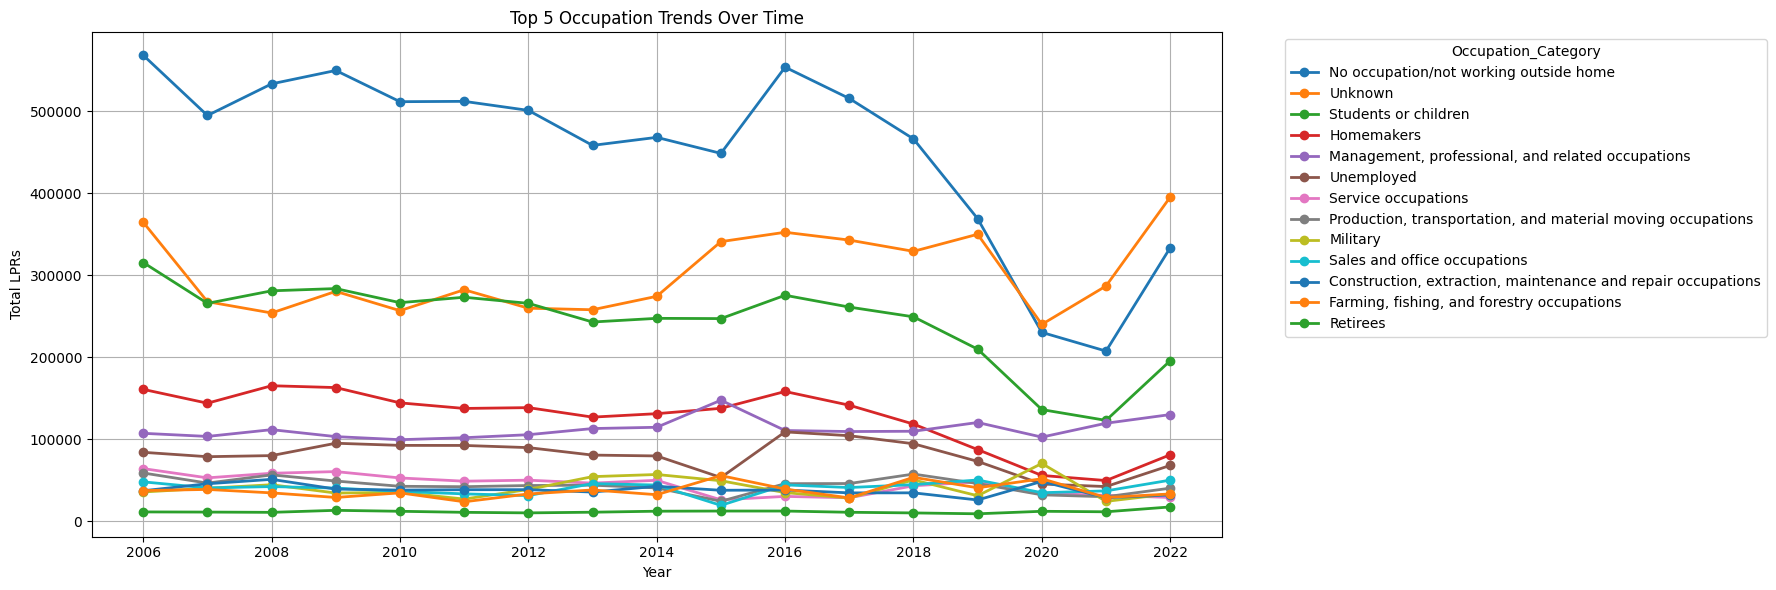

In [27]:
# Step 1: Filter to occupation-only rows
occupation_df = df_common[df_common['Group'] == 'Occupation'].copy()

# Step 2: Assign clean labels
occupation_df['Occupation_Category'] = occupation_df['Subgroup'].str.strip()

# Step 3: Pivot for time-series analysis
trend_df = occupation_df.pivot_table(
    index='Year',
    columns='Occupation_Category',
    values='Total',
    aggfunc='sum'
).fillna(0)

# Step 4: Plot the top 5 occupations
top_5 = trend_df.sum().sort_values(ascending=False).index
trend_df[top_5].plot(figsize=(18, 6), lw=2, marker='o')

# Add title and labels
plt.title('Top 5 Occupation Trends Over Time')
plt.ylabel('Total LPRs')
plt.grid()

# Move legend outside the plot
plt.legend(title="Occupation_Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit everything
plt.tight_layout()
plt.show()


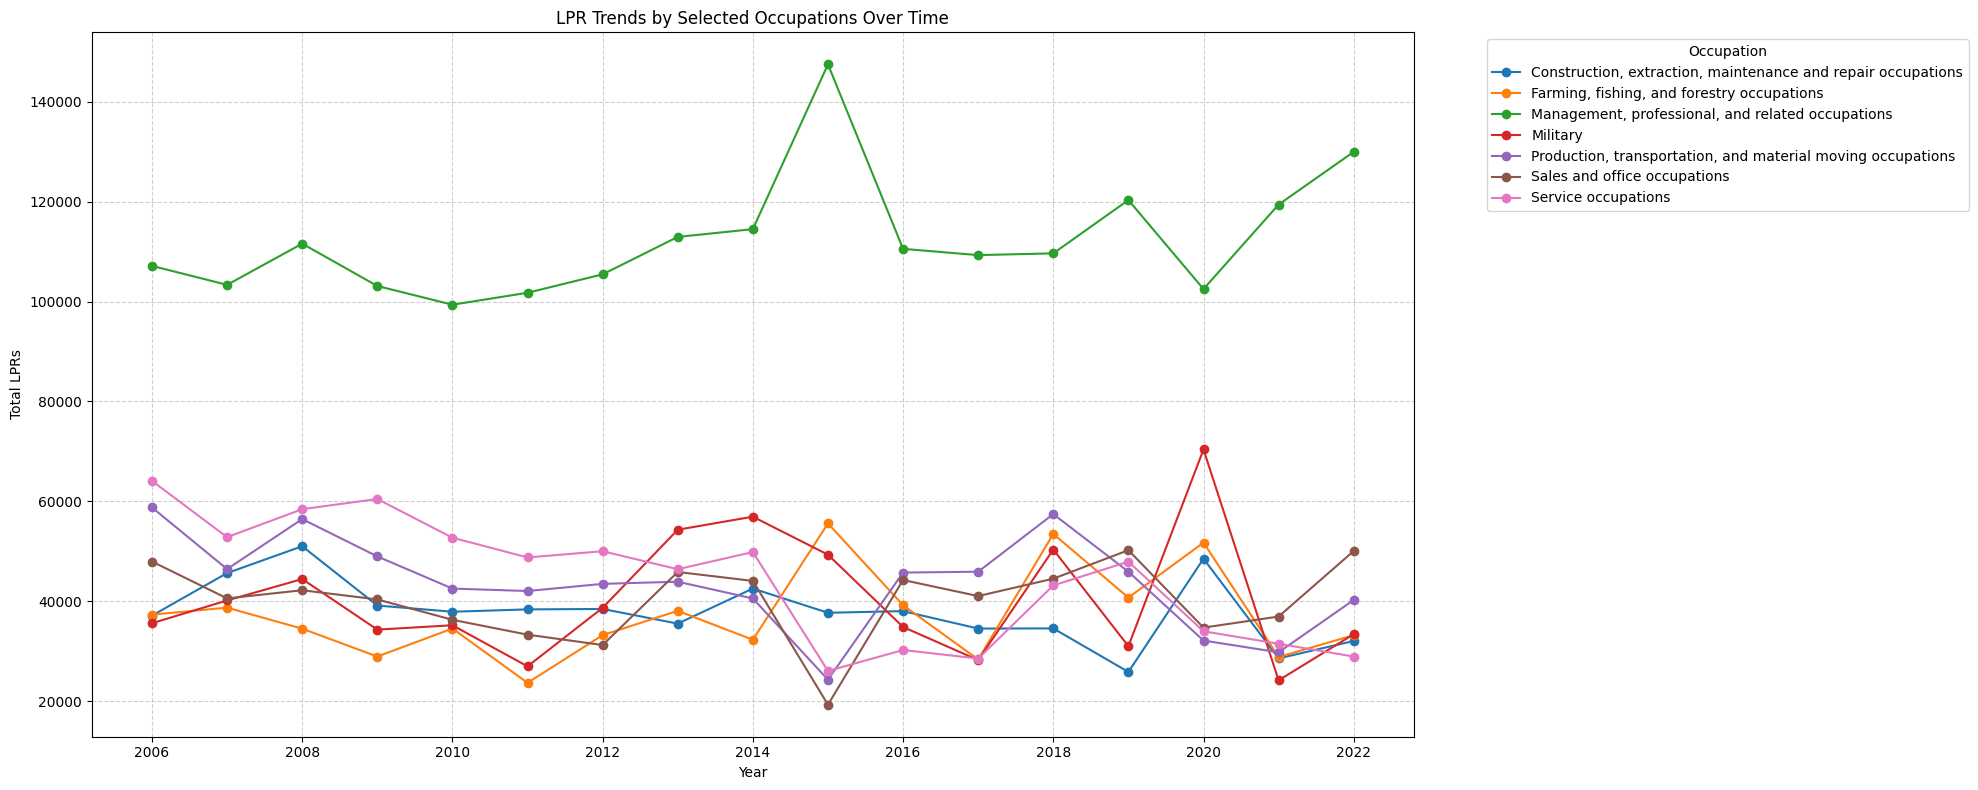

In [28]:
# Step 1: Filter to selected occupation categories
selected_categories = [
    'Management, professional, and related occupations',
    'Construction, extraction, maintenance and repair occupations', 
    'Farming, fishing, and forestry occupations', 
    'Military', 
    'Production, transportation, and material moving occupations', 
    'Sales and office occupations',
    'Service occupations'
]
occupation_df = df_common[df_common['Group'] == 'Occupation'].copy()
occupation_df['Occupation_Category'] = occupation_df['Subgroup'].str.strip()
occupation_df = occupation_df[occupation_df['Occupation_Category'].isin(selected_categories)]

# Step 2: Pivot table to get Year as index and Occupation as columns
trend_df = occupation_df.pivot_table(
    index='Year',
    columns='Occupation_Category',
    values='Total',
    aggfunc='sum'
).fillna(0)

# Step 3: Plot
plt.figure(figsize=(20, 8))
for category in trend_df.columns:
    plt.plot(trend_df.index, trend_df[category], marker='o', label=category)

# Styling
plt.title('LPR Trends by Selected Occupations Over Time')
plt.xlabel('Year')
plt.ylabel('Total LPRs')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


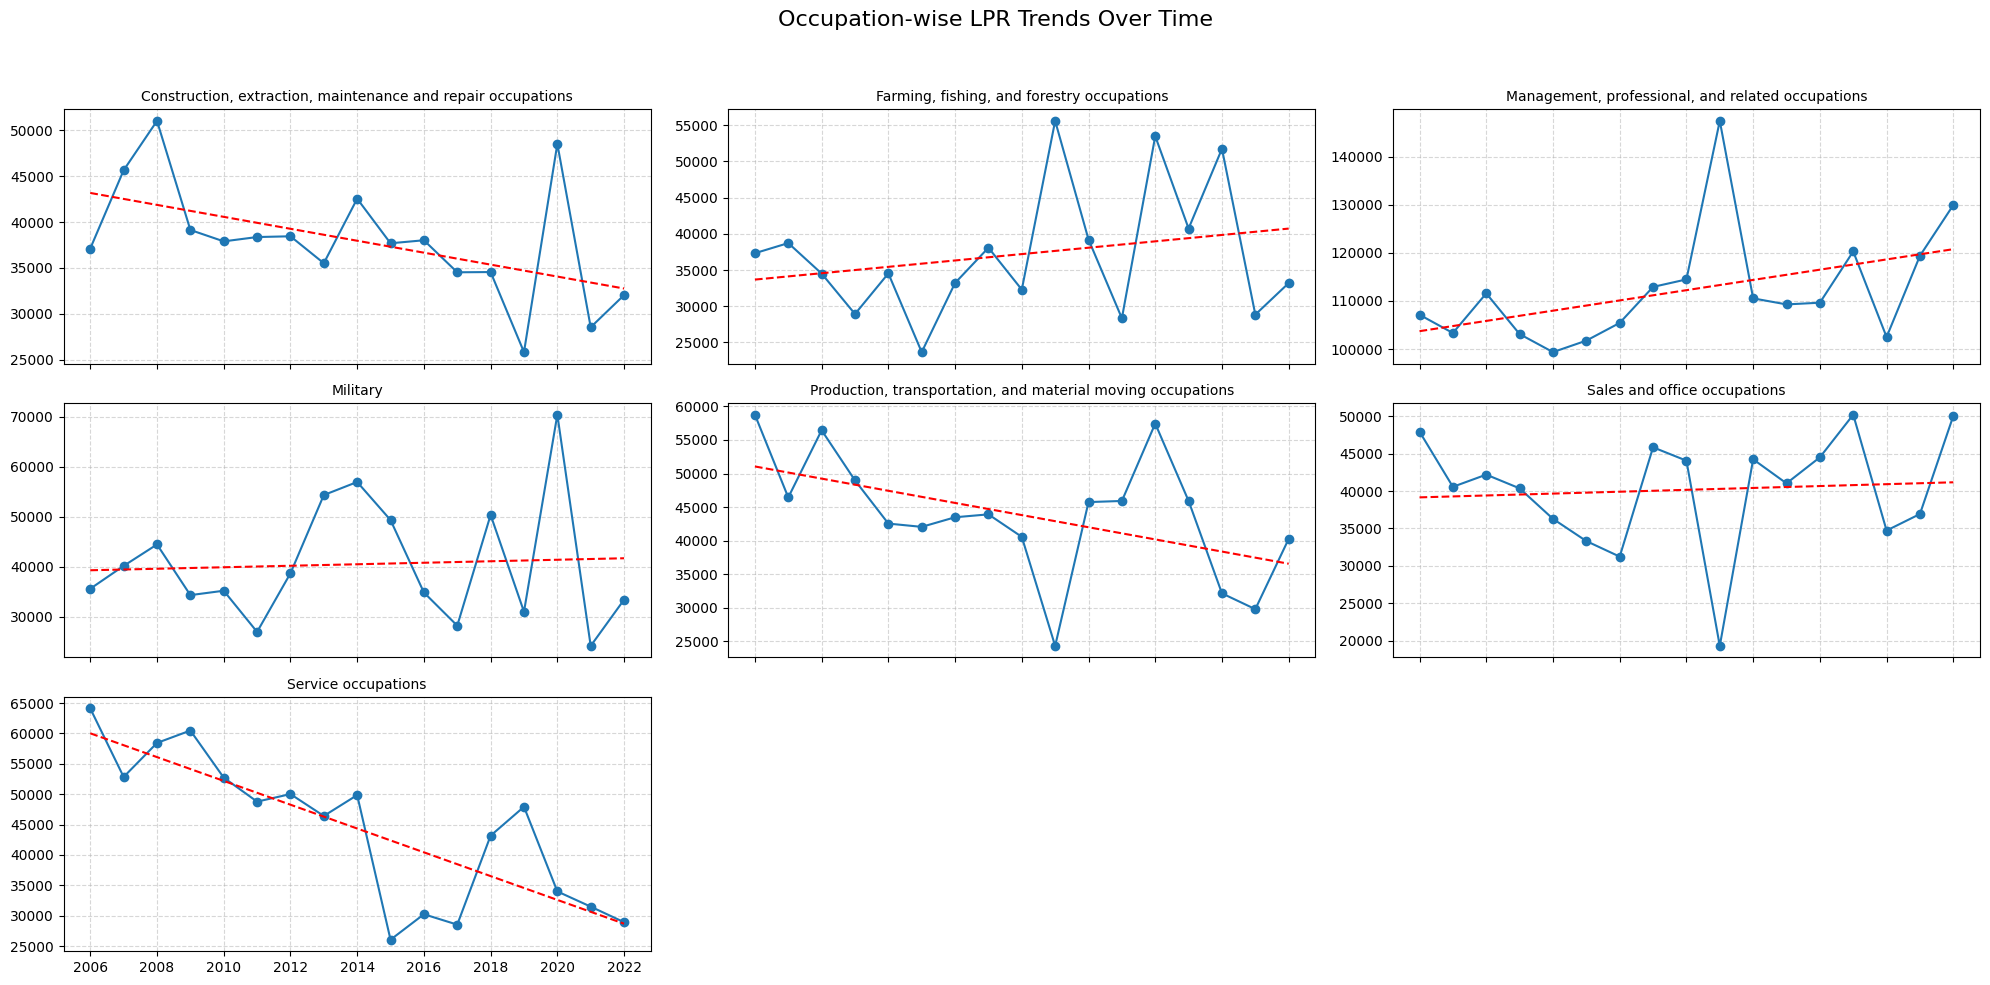

In [29]:
# Filter and prepare data (as before)
selected_categories = [
    'Management, professional, and related occupations',
    'Construction, extraction, maintenance and repair occupations', 
    'Farming, fishing, and forestry occupations', 
    'Military', 
    'Production, transportation, and material moving occupations', 
    'Sales and office occupations',
    'Service occupations'
]

occupation_df = df_common[df_common['Group'] == 'Occupation'].copy()
occupation_df['Occupation_Category'] = occupation_df['Subgroup'].str.strip()
occupation_df = occupation_df[occupation_df['Occupation_Category'].isin(selected_categories)]

# Pivot data
trend_df = occupation_df.pivot_table(
    index='Year',
    columns='Occupation_Category',
    values='Total',
    aggfunc='sum'
).fillna(0)

# Setup subplots
num_categories = len(trend_df.columns)
cols = 3  # Number of columns in grid
rows = (num_categories + cols - 1) // cols  # Auto-calculate rows

fig, axes = plt.subplots(rows, cols, figsize=(20, 10), sharex=True)
axes = axes.flatten()  # Flatten 2D array of axes

# Plot each occupation in its subplot
for idx, category in enumerate(trend_df.columns):
    ax = axes[idx]
    x = trend_df.index.values
    y = trend_df[category].values

    # Line plot
    ax.plot(x, y, marker='o', label='Data')

    # Trend line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle='--', color='red', label='Trend')

    ax.set_title(category, fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Overall labels and layout
fig.suptitle('Occupation-wise LPR Trends Over Time', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle

plt.show()


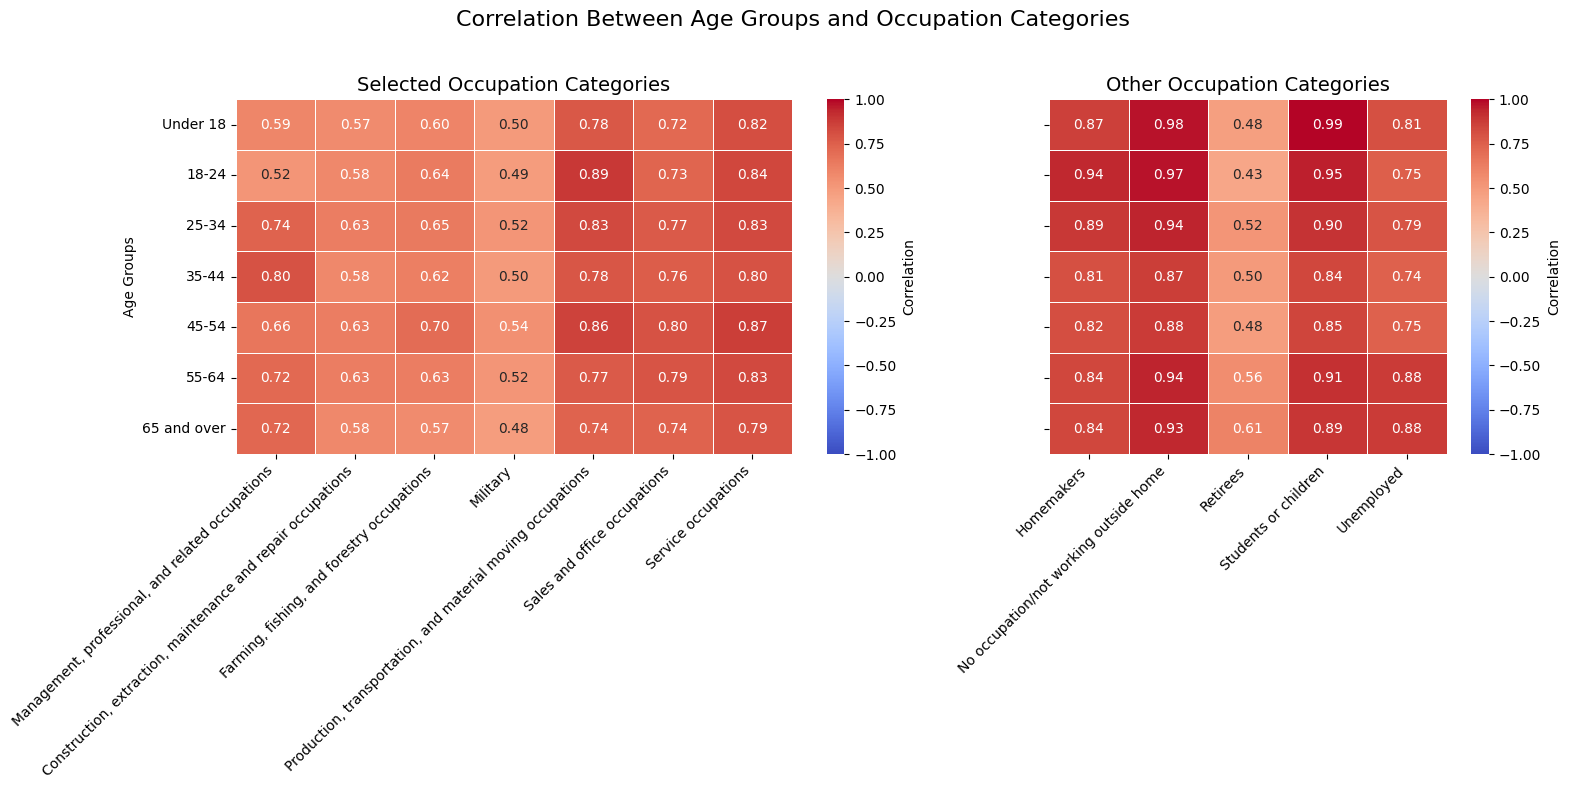

In [30]:
age_df = df_common[df_common['Group'] == 'Age'].copy()
occupation_df = df_common[df_common['Group'] == 'Occupation'].copy()

# Step 2: Standardize age groups
def standardize_age(age):
    age = str(age)
    if 'Under 18' in age:
        return 'Under 18'
    elif '18' in age and '24' in age:
        return '18-24'
    elif '25' in age and '34' in age:
        return '25-34'
    elif '35' in age and '44' in age:
        return '35-44'
    elif '45' in age and '54' in age:
        return '45-54'
    elif '55' in age and '64' in age:
        return '55-64'
    elif '65' in age:
        return '65 and over'
    else:
        return None

age_df['Age_Group'] = age_df['Subgroup'].apply(standardize_age)
occupation_df['Occupation_Category'] = occupation_df['Subgroup'].str.strip()

# Step 3: Group by Year & Region and pivot
age_grouped = age_df.groupby(['Year', 'Region', 'Age_Group'])['Total'].sum().unstack().fillna(0)
occupation_grouped = occupation_df.groupby(['Year', 'Region', 'Occupation_Category'])['Total'].sum().unstack().fillna(0)

# Step 4: Merge on Year & Region
merged = age_grouped.merge(occupation_grouped, on=['Year', 'Region'], how='inner', suffixes=('_Age', '_Occupation'))

# Step 5: Define the selected categories
selected_categories = [
    'Management, professional, and related occupations',
    'Construction, extraction, maintenance and repair occupations',
    'Farming, fishing, and forestry occupations',
    'Military',
    'Production, transportation, and material moving occupations',
    'Sales and office occupations',
    'Service occupations'
]

# Filter for selected categories (must exist in the data)
available_categories = [cat for cat in selected_categories if cat in occupation_grouped.columns]
other_categories = [cat for cat in occupation_grouped.columns if cat not in selected_categories and cat != 'Unknown']

# Step 6: Compute correlation for both sets
correlation_selected = merged.corr().loc[age_grouped.columns, available_categories]
correlation_others = merged.corr().loc[age_grouped.columns, other_categories]

# Reorder the age groups to put "Under 18" at the top
ordered_age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and over']
correlation_selected = correlation_selected.loc[ordered_age_groups]
correlation_others = correlation_others.loc[ordered_age_groups]

# Step 7: Create side-by-side subplot with two heatmaps
# Calculate appropriate figure size based on number of categories
fig_width = min(22, max(16, (len(available_categories) + len(other_categories)) * 0.8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, 8), 
                              gridspec_kw={'width_ratios': [len(available_categories), len(other_categories)]})

# Plot first heatmap (selected categories)
sns.heatmap(correlation_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, 
            vmin=-1, vmax=1, center=0, ax=ax1, cbar_kws={'label': 'Correlation'})
ax1.set_title('Selected Occupation Categories', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Age Groups')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Plot second heatmap (other categories)
sns.heatmap(correlation_others, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, 
            vmin=-1, vmax=1, center=0, ax=ax2, cbar_kws={'label': 'Correlation'})
ax2.set_title('Other Occupation Categories', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('')  # No y-label for the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_yticklabels([])  # Hide y-tick labels for the second subplot

# Add overall title
plt.suptitle('Correlation Between Age Groups and Occupation Categories', fontsize=16, y=0.98)

# Adjust layout to prevent labels from being cut off
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle

# Save the figure
plt.savefig('modified_side_by_side_correlation_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

All admission categories: ['Diversity', 'Employment-based preferences', 'Family-sponsored preferences', 'Immediate relatives of U.S. citizens', 'Other', 'Refugees and asylees']


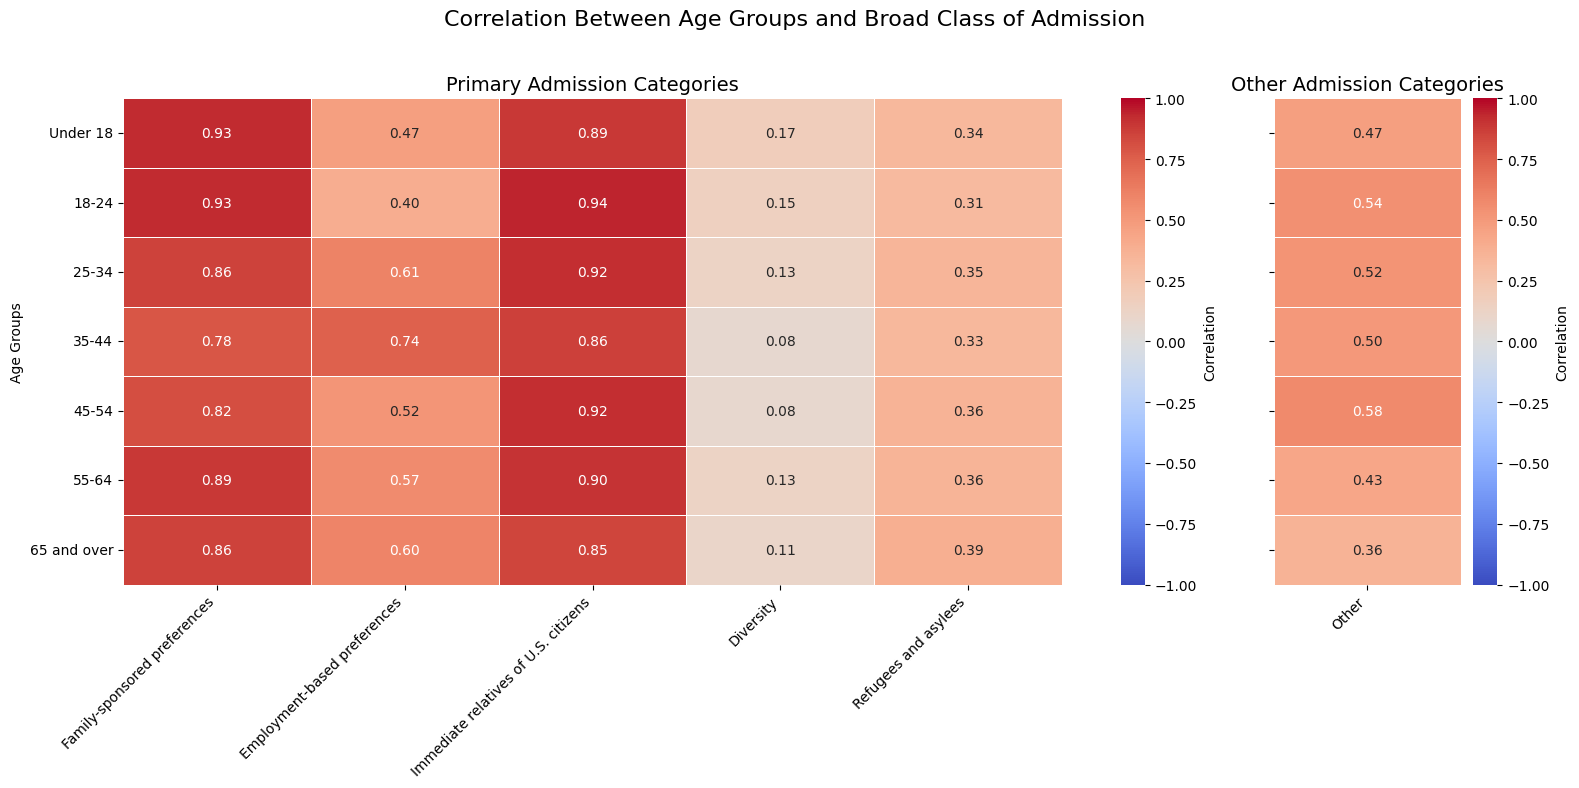

In [31]:
# Age Groups vs. Broad Class of Admission Correlation Analysis

# Step 1: Filter the data for Age and Broad Class of Admission
age_df = df_common[df_common['Group'] == 'Age'].copy()
admission_df = df_common[df_common['Group'] == 'Broad Class of Admission'].copy()

# Step 2: Standardize age groups
def standardize_age(age):
    age = str(age)
    if 'Under 18' in age:
        return 'Under 18'
    elif '18' in age and '24' in age:
        return '18-24'
    elif '25' in age and '34' in age:
        return '25-34'
    elif '35' in age and '44' in age:
        return '35-44'
    elif '45' in age and '54' in age:
        return '45-54'
    elif '55' in age and '64' in age:
        return '55-64'
    elif '65' in age:
        return '65 and over'
    else:
        return None

age_df['Age_Group'] = age_df['Subgroup'].apply(standardize_age)
admission_df['Admission_Category'] = admission_df['Subgroup'].str.strip()

# Step 3: Group by Year & Region and pivot
age_grouped = age_df.groupby(['Year', 'Region', 'Age_Group'])['Total'].sum().unstack().fillna(0)
admission_grouped = admission_df.groupby(['Year', 'Region', 'Admission_Category'])['Total'].sum().unstack().fillna(0)

# Step 4: Merge on Year & Region
merged = age_grouped.merge(admission_grouped, on=['Year', 'Region'], how='inner', suffixes=('_Age', '_Admission'))

# Step 5: Define selected and other admission categories
# First, get all unique admission categories
all_admission_categories = sorted(admission_df['Admission_Category'].unique())
print(f"All admission categories: {all_admission_categories}")

# Select primary admission categories
selected_categories = [
    'Family-sponsored preferences',
    'Employment-based preferences',
    'Immediate relatives of U.S. citizens',
    'Diversity',
    'Refugees and asylees'
]

# Filter for selected categories (must exist in the data)
available_categories = [cat for cat in selected_categories if cat in admission_grouped.columns]
other_categories = [cat for cat in admission_grouped.columns if cat not in selected_categories and cat != 'Unknown']

# Step 6: Compute correlation for both sets
correlation_selected = merged.corr().loc[age_grouped.columns, available_categories]
correlation_others = merged.corr().loc[age_grouped.columns, other_categories]

# Reorder the age groups for logical presentation
ordered_age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and over']
ordered_age_groups = [age for age in ordered_age_groups if age in correlation_selected.index]
correlation_selected = correlation_selected.loc[ordered_age_groups]
correlation_others = correlation_others.loc[ordered_age_groups]

# Step 7: Create side-by-side subplot with two heatmaps
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate appropriate figure size based on number of categories
fig_width = min(22, max(16, (len(available_categories) + len(other_categories)) * 0.8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, 8), 
                              gridspec_kw={'width_ratios': [len(available_categories), len(other_categories)]})

# Plot first heatmap (selected categories)
sns.heatmap(correlation_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, 
            vmin=-1, vmax=1, center=0, ax=ax1, cbar_kws={'label': 'Correlation'})
ax1.set_title('Primary Admission Categories', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Age Groups')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Plot second heatmap (other categories)
sns.heatmap(correlation_others, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, 
            vmin=-1, vmax=1, center=0, ax=ax2, cbar_kws={'label': 'Correlation'})
ax2.set_title('Other Admission Categories', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('')  # No y-label for the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_yticklabels([])  # Hide y-tick labels for the second subplot

# Add overall title
plt.suptitle('Correlation Between Age Groups and Broad Class of Admission', fontsize=16, y=0.98)

# Adjust layout to prevent labels from being cut off
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle

# Save the figure
plt.savefig('age_admission_correlation_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

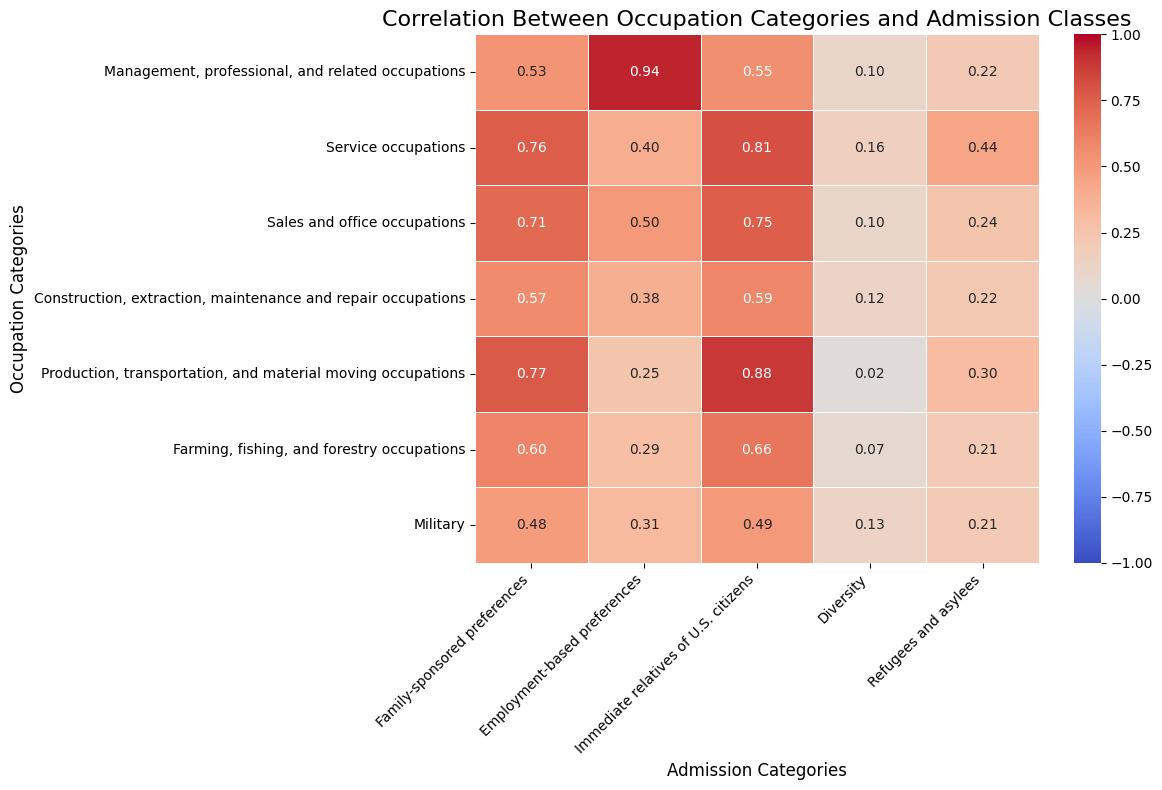

Top 3 strongest positive correlations:
- Employment-based preferences and Management, professional, and related occupations: 0.938
- Immediate relatives of U.S. citizens and Production, transportation, and material moving occupations: 0.884
- Immediate relatives of U.S. citizens and Service occupations: 0.812

Top 3 strongest negative correlations:
- Diversity and Production, transportation, and material moving occupations: 0.024
- Diversity and Farming, fishing, and forestry occupations: 0.067
- Diversity and Management, professional, and related occupations: 0.104


In [32]:
# Occupation vs. Broad Class of Admission Correlation Analysis

# Step 1: Filter the data for Occupation and Broad Class of Admission
occupation_df = df_common[df_common['Group'] == 'Occupation'].copy()
admission_df = df_common[df_common['Group'] == 'Broad Class of Admission'].copy()

# Step 2: Clean category labels
occupation_df['Occupation_Category'] = occupation_df['Subgroup'].str.strip()
admission_df['Admission_Category'] = admission_df['Subgroup'].str.strip()

# Step 3: Group by Year & Region and pivot
occupation_grouped = occupation_df.groupby(['Year', 'Region', 'Occupation_Category'])['Total'].sum().unstack().fillna(0)
admission_grouped = admission_df.groupby(['Year', 'Region', 'Admission_Category'])['Total'].sum().unstack().fillna(0)

# Step 4: Merge on Year & Region
merged = occupation_grouped.merge(admission_grouped, on=['Year', 'Region'], how='inner')

# Step 5: Define key occupation and admission categories
key_occupations = [
    'Management, professional, and related occupations',
    'Service occupations',
    'Sales and office occupations',
    'Construction, extraction, maintenance and repair occupations',
    'Production, transportation, and material moving occupations',
    'Farming, fishing, and forestry occupations',
    'Military'
]

key_admissions = [
    'Family-sponsored preferences',
    'Employment-based preferences',
    'Immediate relatives of U.S. citizens',
    'Diversity',
    'Refugees and asylees'
]

# Filter for categories that exist in the data
available_occupations = [cat for cat in key_occupations if cat in occupation_grouped.columns]
available_admissions = [cat for cat in key_admissions if cat in admission_grouped.columns]

# Step 6: Compute correlations between occupations and admissions
correlation_matrix = merged.corr().loc[available_occupations, available_admissions]

# Step 7: Create a heatmap visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    vmin=-1, 
    vmax=1, 
    center=0
)

plt.title('Correlation Between Occupation Categories and Admission Classes', fontsize=16)
plt.xlabel('Admission Categories', fontsize=12)
plt.ylabel('Occupation Categories', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig('occupation_admission_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Calculate additional statistics
print("Top 3 strongest positive correlations:")
flat_corr = correlation_matrix.unstack()
top_positive = flat_corr.nlargest(3)
for idx, val in top_positive.items():
    print(f"- {idx[0]} and {idx[1]}: {val:.3f}")

print("\nTop 3 strongest negative correlations:")
top_negative = flat_corr.nsmallest(3)
for idx, val in top_negative.items():
    print(f"- {idx[0]} and {idx[1]}: {val:.3f}")